# **Predication Classfication Analysis on Stroke dataset:**

## Introduction
---

**Relevant background information**
<br/>
The topic we will explore is about factors that may cause a stroke. A stroke, also known as a brain attack, occurs when the brain suddenly has its blood supply interrupted in some way (CDC, n.d.). There are two types of strokes: ischemic stroke (stroke caused by blockage inside of a blood vessel in the brain), and a hemorrhagic stroke (a rupture of a blood vessel in the brain). (ibid.) Strokes can happen to anyone; about one-quarter of Canadians will experience a stroke before the age of 65, with a little under 900,000 Canadians aged 20 and under having experienced a stroke (Gov. of Canada).

**Question we try to answer with your project:**
<br/>
Type of question we will answer: **predictive**
<br/>
Can we use the stroke dataset measurements to predict whether a future patient, with an unknown diagnosis, is likely to have a stroke?

**Identify and describe the dataset that will be used to answer the question**
<br/>
The dataset is called "Stroke Prediction Dataset". It contains medical patients' information including gender, age, marital status, previous heart complications, work type and more. However, we are mainly interested in finding only a couple of factors that we think are important in considering whether they have an impact on the patient's likelihood of a stroke. For that reason, we think that it would be relevant to choose patient information relating to their age, average glucose level, and BMI.

**Age**: Age is one of the most significant risk factors when it comes to strokes. As individuals age, the risk of stroke increases dramatically with the majority of strokes occurring after the age of 65. Over 3 quarters of all strokes occur over the age of 65. (Yousufddin & Young, 2019). Furthermore, other age-related conditions such as hypertension and diabetes are more common which further contributes to stroke risk. (ibid.)

**Average Glucose Level**: Higher average glucose levels are indicative of poor blood sugar control in the body, and are closely linked to the increased risk of stroke. Hyperglycemia (abnormally high blood glucose) was observed in at least two-thirds of patients admitted to the hospital for a stroke. (Lindsberg & Roine, 2004)

**BMI (Body Mass Index)**: BMI is a body fat-based index that takes into account the height and weight of the individual. Obesity, which is reflected by a high BMI, is a significant risk factor for strokes due to its strong connection to other risk factors such as hypertension and diabetes. (WSO, n.d.)

## Exploratory Data Analysis
---

 **We will first load in the necessary libraries for the exploratory data analysis:**

In [67]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
options(readr.show_col_types = FALSE)
options(repr.matrix.max.rows = 6)
install.packages('themis')
library(themis)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



**We will set the seed and load in the data from the original source from the web:** 

In [52]:
set.seed(1)
download.file("https://raw.githubusercontent.com/Hannahli6/dsci_project/main/stroke_dataset.csv", 'stroke_dataset.csv')
stroke_data <- read_csv('stroke_dataset.csv')
stroke_data

id    gender age hypertension heart_disease ever_married work_type    
1     9046 Male   67  0            1             Yes          Private      
2    51676 Female 61  0            0             Yes          Self-employed
3    31112 Male   80  0            1             Yes          Private      
⋮    ⋮     ⋮      ⋮   ⋮            ⋮             ⋮            ⋮            
5108 19723 Female 35  0            0             Yes          Self-employed
5109 37544 Male   51  0            0             Yes          Private      
5110 44679 Female 44  0            0             Yes          Govt_job     
     Residence_type avg_glucose_level bmi  smoking_status  stroke
1    Urban          228.69            36.6 formerly smoked 1     
2    Rural          202.21            N/A  never smoked    1     
3    Rural          105.92            32.5 never smoked    1     
⋮    ⋮              ⋮                 ⋮    ⋮               ⋮     
5108 Rural           82.99            30.6 never smoked    0     
5109 Rural          166.29            25.6 formerly smoked 0     
5110 Urban           85.28            26.2 Unknown         0

### **Data wrangling & Cleaning to a format for exploratory data analysis:**
- We will convert 1 = "Yes", 0 = "No" for the stroke column, for a clearer format
- As discussed before, we decided to mainly focus on the relation with factors : *Age, Average glucose level* and *BMI*.

In [53]:
stroke_column <- stroke_data |>
            mutate(stroke = as.character(stroke)) |>
            select(stroke) 
stroke_column[stroke_column == 1] <- "Yes"
stroke_column[stroke_column == 0] <- "No"

stroke_data["stroke"] <- stroke_column |>
        mutate(stroke = as_factor(stroke))

stroke_data <- stroke_data |>
    select(stroke, age, avg_glucose_level, bmi)
stroke_data

stroke age avg_glucose_level bmi 
1    Yes    67  228.69            36.6
2    Yes    61  202.21            N/A 
3    Yes    80  105.92            32.5
⋮    ⋮      ⋮   ⋮                 ⋮   
5108 No     35   82.99            30.6
5109 No     51  166.29            25.6
5110 No     44   85.28            26.2

*Stroke Data Table*

**We will split the data into training and testing data**

In [54]:
#Split the data into training
stroke_data_split <- initial_split(stroke_data, prop = 0.75, strata = stroke)  
stroke_data_training <- training(stroke_data_split)  
stroke_data_testing <- testing(stroke_data_split)

### **Missing data:**
- After looking at the 4 columns in our tibble, we found that only the BMI column has missing data
- Hence, we counted the number of missing data "N/A" in the BMI column

In [55]:
#missing data
stroke_data_missing <- stroke_data_training|>
    filter(bmi == "N/A") |>
    summarize(missing_data = n())
stroke_data_missing

missing_data
1 146

### **Summarise Exploratory Data:**
1. Filtered out the missing information from the BMI column
2. Changed BMI column to numeric
3. We used group_by() and summarise() to find the how many patient had stroke, their average age, average glucose level and average BMI in comparison to patient that never had a stroke.

In [56]:
#summarize exploratory data
num_obs <- nrow(stroke_data_training) 
summarize_data <- stroke_data_training|>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    group_by(stroke) |>
    summarize(count = n(), percentage = n() / num_obs * 100 , avg_age = mean(age), avg_glucose_level= mean(avg_glucose_level), 
              avg_bmi = mean(bmi))
    
summarize_data 

stroke count percentage avg_age  avg_glucose_level avg_bmi 
1 Yes     168   4.384134  67.78571 135.1916          30.53095
2 No     3518  91.805846  41.89125 103.6027          28.83030

*Exploratory data summary table*

From this summary table, over 91% of patients have no stroke compared to the other 4%. Moreover, we notice here that the average age as well as the average glucose level seems to be higher for patients with stroke.


### **Visualization of Exploratory Data:**

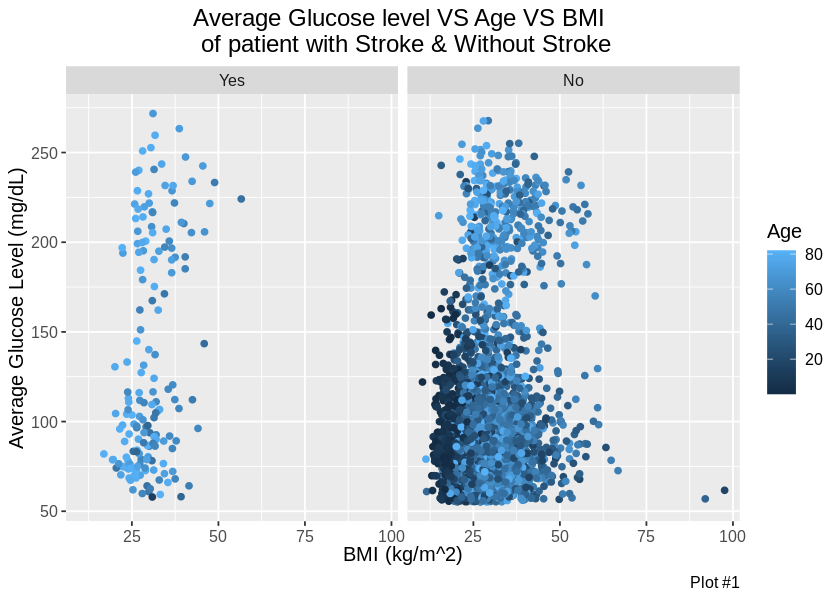

In [57]:
options(repr.plot.width=7, repr.plot.height=5)
#AVG GLUCOSE LEVEL VS BMI VS AGE
stroke_plot <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    ggplot(aes (x= bmi, y=avg_glucose_level, color= age)) +
    facet_grid(~stroke) +
    geom_point() +
    labs(x= "BMI (kg/m^2)", y = "Average Glucose Level (mg/dL)", colour = "Age" ,title = "Average Glucose level VS Age VS BMI \n of patient with Stroke & Without Stroke", caption = "Plot #1") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot

The plot above shows the relationships with all the predicator variables and the predicated class variable.
<br/>
We have abstracted and simplified the plot into multiple different graphs to better demonstrate the relationships. We have numbered the plots as *Plot #1*,  *Plot #2*... for clarity.

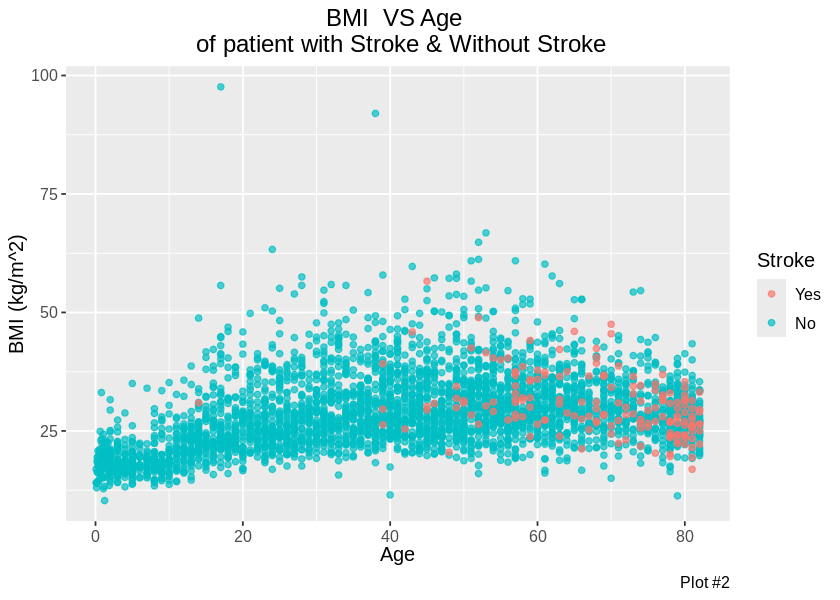

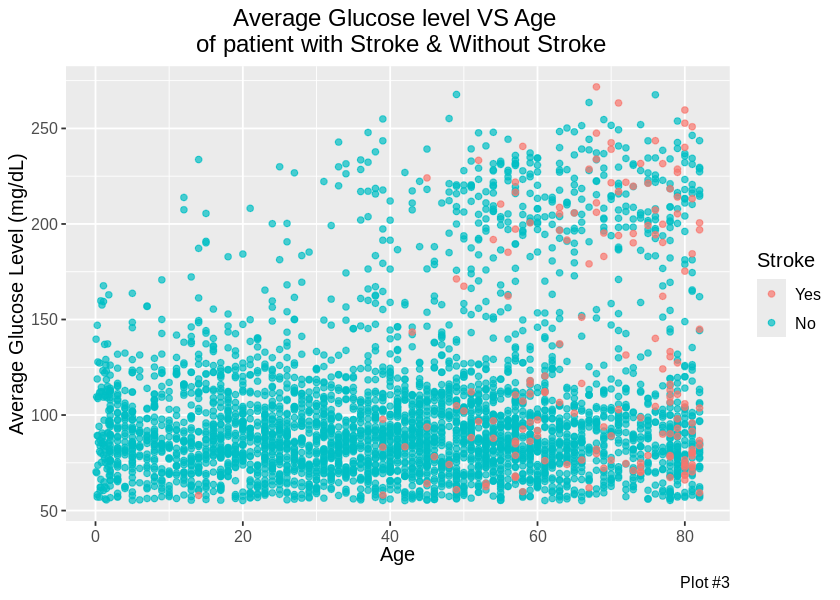

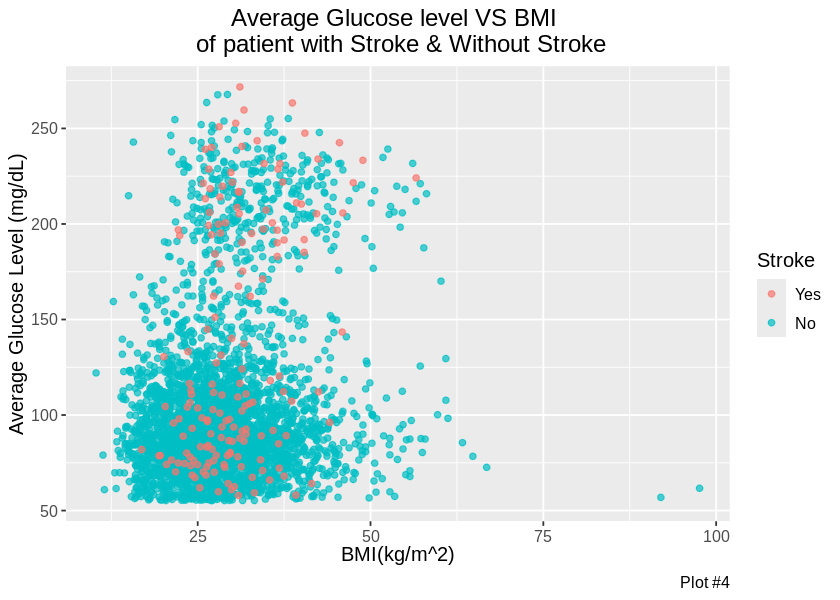

In [81]:

#BMI VS AGE
stroke_plot1 <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    arrange(desc(stroke)) |>
    ggplot(aes (x= age, y=bmi, colour = stroke)) +
    geom_point(alpha = 0.7) +
    labs(x= "Age", y = "BMI (kg/m^2)", colour = "Stroke",title = "BMI  VS Age \n of patient with Stroke & Without Stroke", caption = "Plot #2") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot1

#AVG GLUCOSE LEVEL VS AGE
stroke_plot2 <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    arrange(desc(stroke)) |>
    ggplot(aes (x= age, y=avg_glucose_level, color= stroke)) +
    geom_point(alpha = 0.7) +
    labs(x= "Age", y = "Average Glucose Level (mg/dL)", colour = "Stroke" ,title = "Average Glucose level VS Age \n of patient with Stroke & Without Stroke", caption = "Plot #3") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot2

#AVG GLUCOSE LEVEL vs BMI
stroke_plot3 <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    arrange(desc(stroke)) |>
    ggplot(aes (x= bmi, y=avg_glucose_level, color= stroke)) +
    geom_point(alpha = 0.7) +
    labs(x= "BMI(kg/m^2)", y = "Average Glucose Level (mg/dL)", colour = "Stroke" ,title = "Average Glucose level VS BMI \n of patient with Stroke & Without Stroke", caption = "Plot #4") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot3


#### **Based on the visualization from EDA:**

1. Age: From Plot#1, we noticed that amongst the patients who have had a stroke, many of them seem to be older individuals,  shown by the lighter blue points, representing their age range of 60 - 80 years old.
   
2. Average Glucose Level: Looking at Plot #4, about 50% of patients who have had a stroke have an average glucose level of ~100mg/dL, and the other half at ~225mg/dL. Also, we can roughly estimate that 70-80% of the people who never had a stroke have an average glucose level of 100mg/dL.
   
3. BMI: Patients who have had a stroke have a smaller BMI range of ~25-40kg/m^2 whereas the BMI range for people who have not had a stroke is ~10-50kg/m^2.

4. Class Balance: The 'Yes' category (patients who have had a stroke) seems underrepresented compared to the 'No' category. This class imbalance could affect the performance of predictive models if not addressed properly.


## **Data Anaylsis: Classification**
---

#### **Step 0: Remove the dataset that has NA value and change the data type.**

In [59]:
stroke_data_training <- stroke_data_training |>
                        filter(bmi != "N/A") |>
                        mutate(bmi = as.numeric(bmi))
stroke_data_testing <- stroke_data_testing |>
                        filter(bmi != "N/A") |>
                        mutate(bmi = as.numeric(bmi))
stroke_data_training

stroke age avg_glucose_level bmi 
1    Yes    67  228.69            36.6
2    Yes    80  105.92            32.5
3    Yes    49  171.23            34.4
⋮    ⋮      ⋮   ⋮                 ⋮   
3684 No     35   82.99            30.6
3685 No     51  166.29            25.6
3686 No     44   85.28            26.2

#### **Step 1: Balance our dataset using step_upsample.**
- Since we only have an unbalanced proportional of 4% of patients (who have had stroke) and 91% who have not, we will upsample our dataset to make the votes more even when using the KNN algorithmn. 

In [82]:
ups_recipe <- recipe(stroke ~ age + avg_glucose_level + bmi , data = stroke_data_training) |>
    step_upsample(stroke, over_ratio = 1, skip = FALSE) |>
    prep()
upsampled_stroke <- bake(ups_recipe, stroke_data_training)

upsampled_stroke |>
  group_by(stroke) |>
  summarize(n = n())

stroke n   
1 Yes    3518
2 No     3518

#### **Step 2: Create a recipe and model for our stroke dataset.**

- We will use *bmi*, *average glucose level* and *age* as predictors and *stroke* as the  predicted class and use our balanced dataset.
- we will standardize the training data, to ensure all predictor variables contribute equal weight in terms of their vote.
- Build a model specification to specify the model and training algorithm

In [70]:
stroke_recipe <- recipe(stroke ~ age + avg_glucose_level + bmi, data = upsampled_stroke) |>
                 step_scale(all_predictors()) |>
                 step_center(all_predictors()) 

#step 2: create the knn model.
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

#### **Step 3: Performing a 5-fold cross-validation dataset and creating a table with the k value we would like to tune.**
- We will create five  train/validation splits from our upsampled training dataset. 
- We set the range of k-nearest neighbors from 1 to 20, incrementing by 1. We have also tried the range from 1 to 40, however, the accuracy estimated continues to decrease further past k = 20. 

In [71]:

stroke_vfold <- vfold_cv(upsampled_stroke, v = 5, strata = stroke)

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1 ))


#### **Step 4: Create workflow and plot our accuracy graph.**
- we will use the tune_grid() to fit the model for each value in a range of parameter values that we created in the previous step
- We will then decide which number of neighbors is most suitable by plotting the accuracy versus K

neighbors .metric  .estimator mean      n std_err     .config              
1  1         accuracy binary     0.9738521 5 0.003366872 Preprocessor1_Model01
2  1         roc_auc  binary     0.9738521 5 0.003366872 Preprocessor1_Model01
3  2         accuracy binary     0.9738521 5 0.003366872 Preprocessor1_Model02
⋮  ⋮         ⋮        ⋮          ⋮         ⋮ ⋮           ⋮                    
38 19        roc_auc  binary     0.9271953 5 0.004591075 Preprocessor1_Model19
39 20        accuracy binary     0.8463680 5 0.006514648 Preprocessor1_Model20
40 20        roc_auc  binary     0.9214977 5 0.004589768 Preprocessor1_Model20

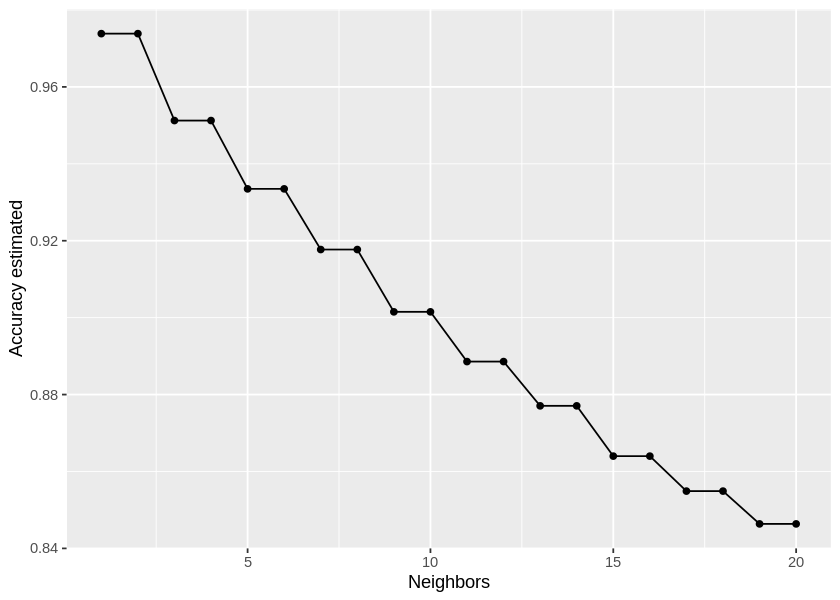

In [72]:
knn_results <- workflow() |>
               add_recipe(stroke_recipe) |>
               add_model(knn_spec) |>
               tune_grid(resamples = stroke_vfold, grid = k_vals) |>
               collect_metrics()
knn_results           
accuracies <- knn_results |>
              filter(.metric == "accuracy")

cross_val_plot <- accuracies |>
                  ggplot(aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = "Neighbors",
                       y = "Accuracy estimated")

cross_val_plot

**Our process of finding the Best K and Cross-Validation**
<br/>
    - Initially, we tried to perform cross-validation with our original training data. However, during the process, we encountered a strange correlation such that the accuracy estimated continued to increase as the k-neighbors increased.  This is a problem because we know that a very large K-neighbour can lead to underfitting. We suspected that there could have been an unbalanced number of observations for our predicted class variable.
<br/>
    -Looking at our EDA summary table, it seems to be that we only have 5% 'yes-stroke' observations in comparison to around 91% 'no-stroke' observations. We then tried to rebalance the data by oversampling the stroke prediction variable. By upsampling the data, we will replicate the "stroke" observations multiple times in our data set to give them more voting power in the K-nearest neighbors algorithm. Using the upsampled data to perform cross-validation, we obtain another strange result where the highest accuracy estimated seems to be at K-neighbors = 1. We know this is also abnormal because k=1 would indicate overfitting. With these assumptions and to not have major overfitting or underfitting, we took a reasonable estimate and set k = 4. 
<br/>

#### **Step 5: Tunning our classifier with the best value of K and fit into workflow.**
- Choosing k=4, we will use this value for our model
- we will retrain the K-NN classifier on the whole upsampled training data set using the best k value we picked

In [68]:
knn_tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_tune_fit <- workflow() |>
  add_recipe(stroke_recipe) |>
  add_model(knn_tune_spec) |>
  fit(data = upsampled_stroke)

#### **step 6: Using our model to predict our testing dataset and create a confusion metrics.**

In [76]:

stroke_predictions <- predict(knn_tune_fit , stroke_data_testing) |>
      bind_cols(stroke_data_testing)
stroke_predictions

stroke_metrics <- stroke_predictions |>
        metrics(truth = stroke, estimate = .pred_class) |>
        filter(.metric == "accuracy")
stroke_metrics


.pred_class stroke age avg_glucose_level bmi 
1    No          Yes    79  174.12            24.0
2    Yes         Yes    81  186.21            29.0
3    No          Yes    69   94.39            22.8
⋮    ⋮           ⋮      ⋮   ⋮                 ⋮   
1221 No          No     45   97.95            24.5
1222 No          No     57   77.93            21.7
1223 No          No     13  103.08            18.6

.metric  .estimator .estimate
1 accuracy binary     0.9043336

***Prediction Table*** & ***Accuracy Estimate Table*** (Top Down)

#### **Observing rows of correctly predicted 'Yes-Stroke' cases**:
---

In [79]:
stroke_predicted_correct <- stroke_predictions |>
    filter(.pred_class == 'Yes', stroke == 'Yes')
stroke_predicted_correct

stroke_predicted_correct_summarize <- stroke_predicted_correct|>
    summarise(max_age = max(age), min_age = min(age) , avg_age = mean(age), avg_glucose_level = mean(avg_glucose_level), avg_bmi = mean(bmi))
stroke_predicted_correct_summarize

.pred_class stroke age avg_glucose_level bmi 
1 Yes         Yes    81  186.21            29.0
2 Yes         Yes    80   66.72            21.7
3 Yes         Yes    79  129.98            22.6
⋮ ⋮           ⋮      ⋮   ⋮                 ⋮   
6 Yes         Yes    82  215.94            27.9
7 Yes         Yes    79   72.73            28.4
8 Yes         Yes    79   97.73            21.5

max_age min_age avg_age avg_glucose_level avg_bmi
1 82      68      77.5    129.0775          26.9625

**Correctly Predicted 'Yes-Stroke' Cases Table** & **Correctly Predicted 'Yes-Stroke' Cases Summary Table** (Top Down)

#### **Observing rows of correctly predicted 'No-Stroke' cases**:
---

In [80]:
stroke_predicted_correct <- stroke_predictions |>
    filter(.pred_class == 'No', stroke == 'No')
stroke_predicted_correct

stroke_predicted_correct_summarize <- stroke_predicted_correct|>
    summarise(max_age = max(age), min_age = min(age) , avg_age = mean(age), avg_glucose_level = mean(avg_glucose_level), avg_bmi = mean(bmi))
stroke_predicted_correct_summarize

.pred_class stroke age avg_glucose_level bmi 
1    No          No      3   95.12            18.0
2    No          No     37  162.96            39.4
3    No          No     42   82.67            22.5
⋮    ⋮           ⋮      ⋮   ⋮                 ⋮   
1096 No          No     45   97.95            24.5
1097 No          No     57   77.93            21.7
1098 No          No     13  103.08            18.6

max_age min_age avg_age  avg_glucose_level avg_bmi 
1 82      0.16    39.46787 103.4135          28.70046

**Correctly Predicted 'No-Stroke' Cases Table** & **Correctly Predicted 'No-Stroke' Cases Summary Table** (Top Down)

#### **Confusion Matrix**
---

          Truth
Prediction  Yes   No
       Yes    8   84
       No    33 1098

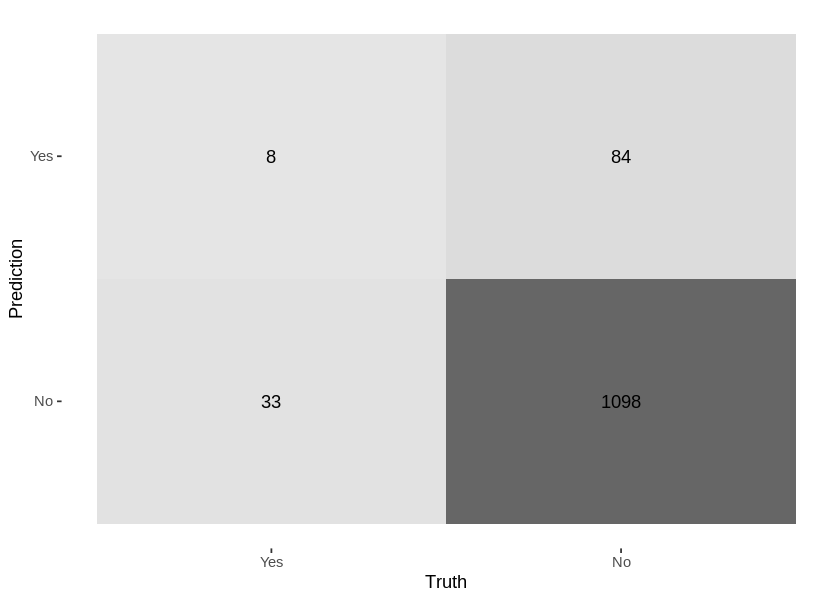

In [65]:
stroke_conf_mat <- stroke_predictions |> 
      conf_mat(truth = stroke, estimate = .pred_class)
stroke_conf_mat

conf_mat_visualization <- autoplot(stroke_conf_mat, type = "heatmap")
conf_mat_visualization

#### **Accuracy, Precision & Recall**
------

In [66]:
test_result_info <- tibble(accuracy = 1105/1223, precision = 8/(85+8), recall =8/(8+33) )
test_result_info

accuracy  precision  recall  
1 0.9035159 0.08602151 0.195122


## **Discussion:**
---
### **Summarize what you found:**

**Compute metrics of performance by predicting labels on testing data**
<br/>
Looking at the compute metrics performance of our model from the confusion matrix, we see that our model has a high accuracy of approximately 90%. This indicates that a significant proportion of predictions are correct out of the total predictions made. However, our recall and precision values are quite low; recall: 19%, and precision: 8%.
<br/>

Based on the 8 correctly predicted cases of patients who have had a stroke, we found that their age range was from 68 to 82 years old, with an average age of 77. Their average glucose level is around 129mg/dL and their average BMI is around 26.9kg/m^2. 
Similarly, looking at the 1098 correctly predicted cases of people who have never had a stroke, we noticed that their age ranges from one month old to 81 years old, with an average age of 39. Their average glucose level is 103.4mg/dL and their average BMI at around 28.7kg/m^2.
From this, we can say that people over the age of 68 with an average glucose level of 129mg/dL and BMI of 26.8kg/m^2 have a high likelihood of having a stroke.
    
### **Discuss whether this is what you expected to find.**
This is what we expected to find! From our exploratory data analysis, we had already noticed that many patients who have had a stroke are older individuals with higher average glucose levels. 

This result of our model is not what we expected since we did not expect our recall and precision percentage to be this low. We were surprised that our accuracy would be this high in predicting patients with no stroke. This could partly be due to there being a very small number of cases of "stroke" observations while having a large number of cases of 'no-stroke'. Our suggestion for future improvement in our model is perhaps to have more observations of "stroke" patients so our algorithm can more clearly identify the differences based on those factors.  

### **Discuss what impact could such findings have.**
From the correctly predicted cases of patients with stroke,  we can say that people over the age of 68 with an average glucose level of 129mg/dL and BMI of 26.8kg/m^2 have a high likelihood of having a stroke. A glucose level over 126mg/dL is considered diabetes, while levels below 100mg/dL are considered normal.  (CDC gov.) Since we see that age and glucose level are highly correlated to the likelihood of having a stroke, we think it is important for this age range of people to have a consistently balanced diet to maintain optimal glucose levels, exercise regularly, and have regular medical check-ups and monitorings to lower the risk of having a stroke. 


### **Discuss what future questions this could lead to**
1. Are there any other factors that may increase the stroke risk other than average glucose level, BMI, and age? Or is there any factor that may significantly affect these three predictors? Perhaps, the history of previous heart complications or their gender?
2. The EDA (Exploratory Data Analysis) has revealed relationships that are consistent with known medical insights, which supports their use in a predictive model for stroke likelihood. We wonder if using these predictor variables (age, BMI, glucose level) on another more balanced stroke dataset can help with the precision of our model. 

## **References:**
 - - - - - 

CDC. “About Stroke | cdc.gov.” Centers for Disease Control and Prevention, 4 May 2023, https://www.cdc.gov/stroke/about.htm. 

FEDESORIANO (2021). Stroke Prediction Dataset, Version 1. Retrieved Mar 4 from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

Lindsberg, Perttu J., and Risto O. Roine. “Stroke.” Hyperglycemia in Acute Stroke, vol. 35, no. 2, 2004, pp. 363-364, https://www.ahajournals.org/doi/10.1161/01.STR.0000115297.92132.84.

WHO. “The top 10 causes of death.” World Health Organization (WHO), 9 December 2020, https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death. 

WSO. “UNDERSTANDING WEIGHT AND STROKE.” World Stroke Organization, https://www.world-stroke.org/assets/downloads/WSO_DontBeTheOne_PI_Leaflets_-_WEIGHT.pdf.

Yousufuddin, Mohammed, and Nathan Young. “AGING.” Aging and ischemic stroke, vol. 11, no. 9, 2019, pp. 2542-2544, https://www.aging-us.com/article/101931/pdf.

“Diabetes Tests.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 28 Feb. 2023, www.cdc.gov/diabetes/basics/getting-tested.html. 